<a href="https://colab.research.google.com/github/IshantWadhwa4/Machine_Learning/blob/master/Supervisedlearning/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN 

K Nearest Neighbour

K-Nearest Neighbours is one of the most basic yet essential classification algorithms in Machine Learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning, it does not make any underlying assumptions about the distribution of data. Supervised learning, in the context machine learning, is a type of system in which both input and desired output data are provided. Input and output data are labelled for classification to provide a learning basis for future data processing. 

In [0]:
import pandas as pd

In [2]:
glass = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.info()
# no null value and data is already in the numeric form

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [0]:
  import seaborn as sns
import matplotlib.pyplot as plt

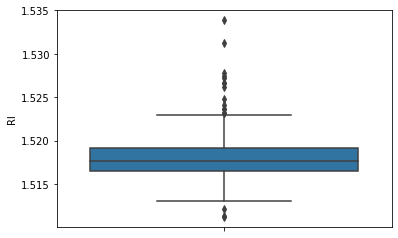

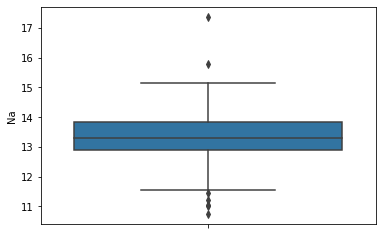

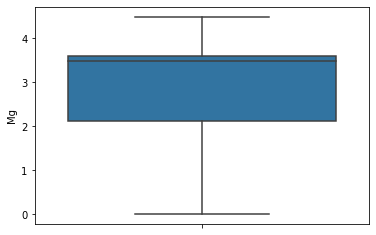

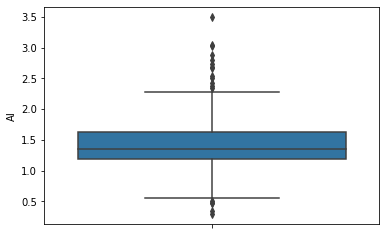

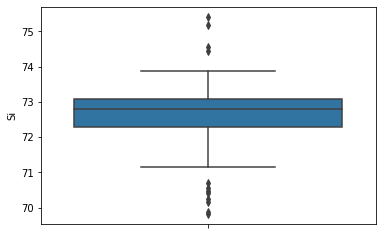

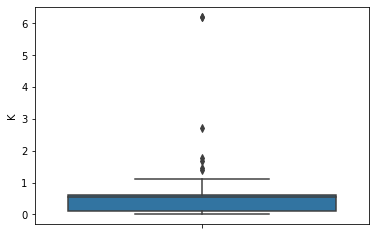

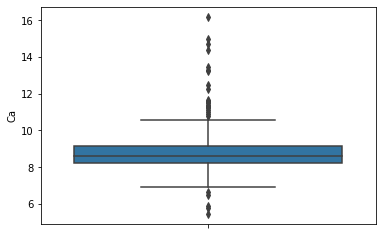

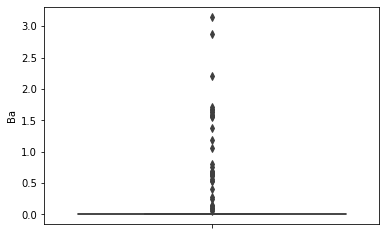

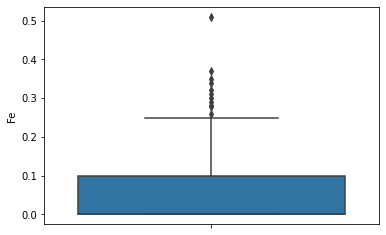

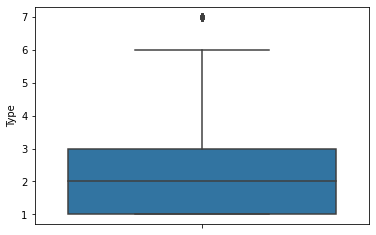

In [0]:
for col in glass.columns:
  sns.boxplot(y=col,data=glass)
  plt.show()

In [0]:
# from above we can see there are outliar in Fe,Ca,K,SI,AL,NA,RL
# check for Ba
# in Fe and Ba there are many 0 values 

# here 0 has some significant so we should not remove them
# 1. we need to scale them
# 2. normalise the data 

# Experiment 1 : In this we are considering outliar not removing it

In [0]:
glass[glass['Ba'] > 0.5 ]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
61,1.51977,13.81,3.58,1.32,71.72,0.12,8.67,0.69,0.00,1
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.00,7
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00,7
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
190,1.51613,13.88,1.78,1.79,73.10,0.00,8.67,0.76,0.00,7
191,1.51602,14.85,0.00,2.38,73.28,0.00,8.76,0.64,0.09,7
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7


In [0]:
# corelation b/w variables
corr_glass = glass.corr()

In [0]:
corr_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


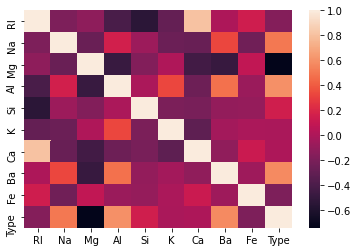

In [0]:
sns.heatmap(corr_glass)

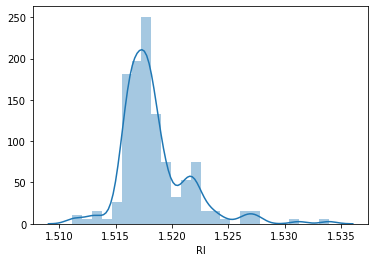

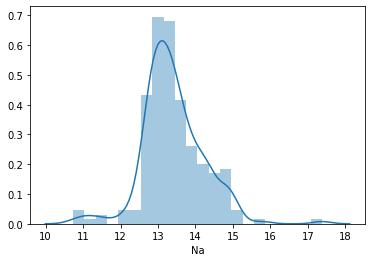

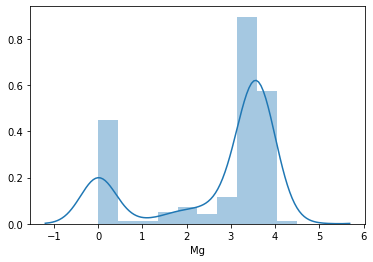

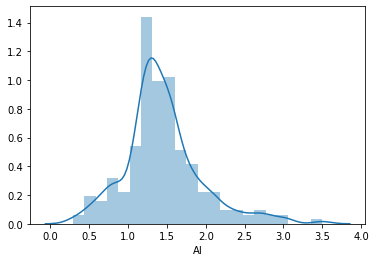

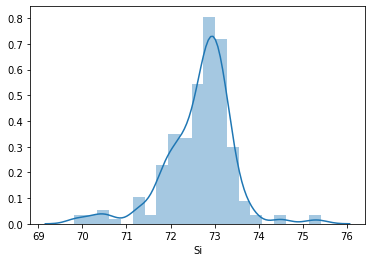

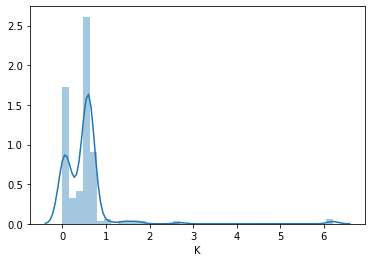

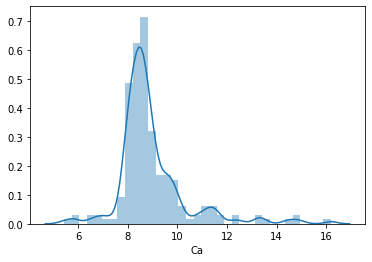

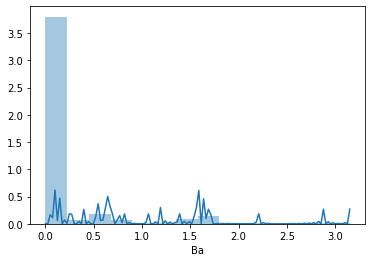

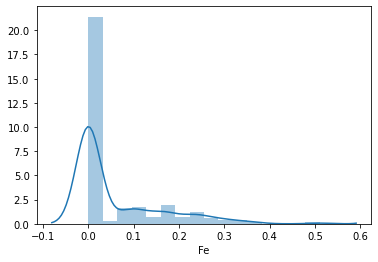

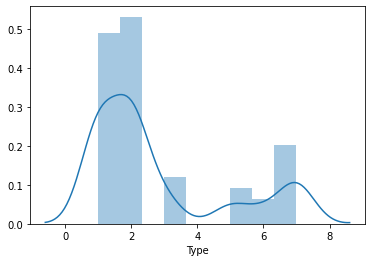

In [0]:
# see the data distribution for each variable
for col in glass.columns:
  sns.distplot(glass[col])
  plt.show()

In [0]:
glass.skew()
# K and Ba, ca are highly skew so we need to do normalise the data

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [0]:
# now we will do standered scaling
from sklearn.preprocessing import StandardScaler

glass_X_data = glass.drop('Type',axis = 1)
ss = StandardScaler()

ss.fit(glass_X_data)

glass_scale_X_data = ss.transform(glass_X_data) 

In [0]:
glass_data = pd.DataFrame(glass_scale_X_data)

In [0]:
glass_data['Type'] = glass['Type']

In [0]:
glass_data.columns = glass.columns

In [0]:
glass_data.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

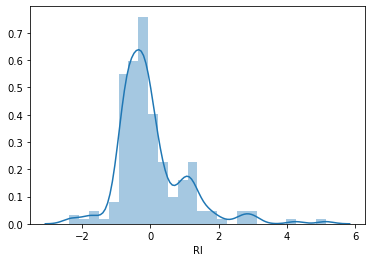

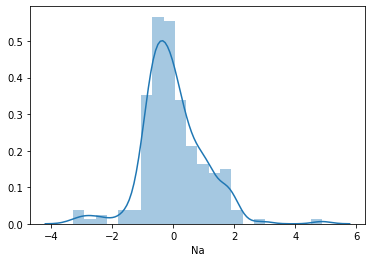

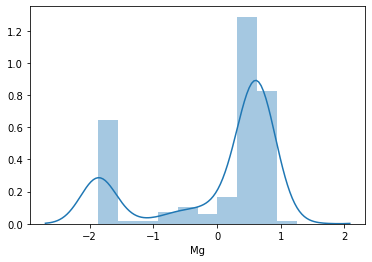

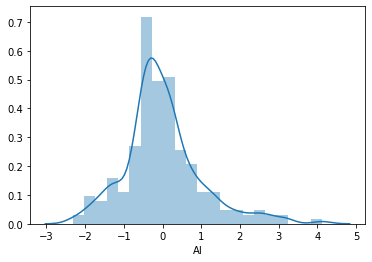

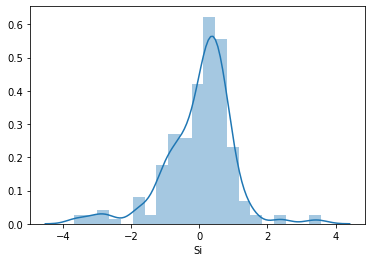

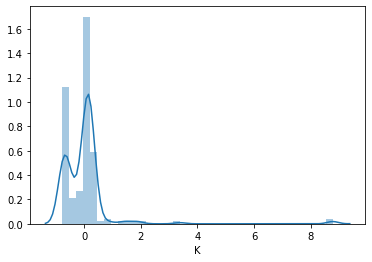

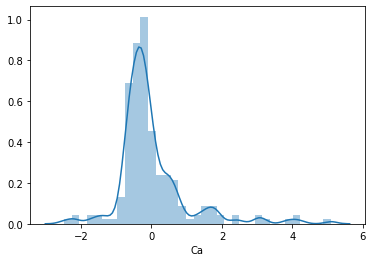

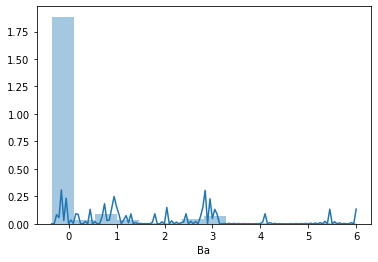

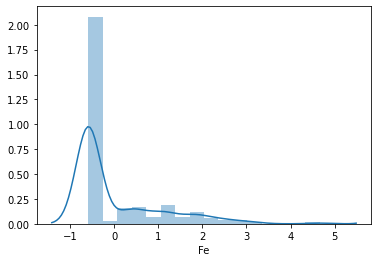

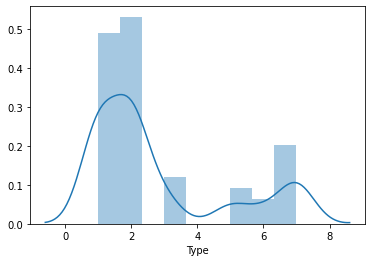

In [0]:
# see the data distribution for each variable
for col in glass_data.columns:
  sns.distplot(glass_data[col])
  plt.show()

In [0]:
# experiment 1

from sklearn.model_selection import train_test_split
x = glass_data.drop('Type',axis=1)
y = glass_data['Type']
X_train,X_test,y_train,y_test = train_test_split(x  , y , random_state = 1, test_size = 0.3)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,p=2, metric='minkowski',n_jobs= -1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_predict = knn.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_predict,y_test)

0.7384615384615385

In [17]:
for k in range(5,18):
  knn = KNeighborsClassifier(n_neighbors=k,p=2, metric='minkowski',n_jobs= -1)
  knn.fit(X_train,y_train)
  y_predict = knn.predict(X_test)
  print("For the value of k = {0} the accuracy score is {1}".format(k,accuracy_score(y_predict,y_test)))



For the value of k = 5 the accuracy score is 0.7384615384615385
For the value of k = 6 the accuracy score is 0.7076923076923077
For the value of k = 7 the accuracy score is 0.7230769230769231
For the value of k = 8 the accuracy score is 0.7230769230769231
For the value of k = 9 the accuracy score is 0.7384615384615385
For the value of k = 10 the accuracy score is 0.7538461538461538
For the value of k = 11 the accuracy score is 0.7538461538461538
For the value of k = 12 the accuracy score is 0.7384615384615385
For the value of k = 13 the accuracy score is 0.7076923076923077
For the value of k = 14 the accuracy score is 0.7076923076923077
For the value of k = 15 the accuracy score is 0.7230769230769231
For the value of k = 16 the accuracy score is 0.7384615384615385
For the value of k = 17 the accuracy score is 0.7076923076923077
